In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
def initialize(L, T, J, steps, theta_table):
    N = L**3
    theta = np.zeros((L,L,L))
    for i in range(L):
        for j in range(L):
            for k in range(L):
                theta[i,j,k] = random.choice(theta_table)
    return theta

In [11]:
theta_table = np.linspace(0, 2*np.pi, 1000)
theta = initialize(3, 1, )

In [4]:
def find_neighbors(i,j,k):
    # PBC
    index = [L-1 if i == 0 else i-1, 0 if i == L-1 else i+1, L-1 if j == 0 else j-1, 0 if j == L-1 else j+1, L-1 if k == 0 else k-1, 0 if k == L-1 else k+1]
    return index

In [5]:
def energy_per_site(i,j,k):
    index = find_neighbors(i,j,k)
    E = -J*(np.cos(theta[i,j,k] - theta[index[0],j,k])
    + np.cos(theta[index[1],j,k] - theta[i,j,k])
    + np.cos(theta[i,j,k] - theta[i,index[2],k])
    + np.cos(theta[i,index[3],k] - theta[i,j,k])
    + np.cos(theta[i,j,k] - theta[i,j,index[4]])
    + np.cos(theta[i,j,index[5]] - theta[i,j,k]))
    return E

In [ ]:
def compute_energy_table():
    

In [40]:
def flip():
    i = np.random.randint(0,L)
    j = np.random.randint(0,L)
    k = np.random.randint(0,L)
    theta_b = theta[i,j,k]
    E_b = energy_per_site(i,j,k)
    theta[i,j,k] = np.random.uniform(0,2*np.pi)
    dE = energy_per_site(i,j,k) - E_b
    if dE < 0:
        return True
    elif (np.exp(-dE/T) > np.random.uniform(0,1)):
        return True
    else:
        theta[i,j,k] = theta_b
        return False

In [41]:
def MCMC():
    for i in range(N):
        v = flip()

In [42]:
def magnetization():
    mx = np.sum(np.cos(theta))
    my = np.sum(np.sin(theta))
    return np.sqrt(mx**2 + my**2)/N

In [43]:
def runMCMC():
    m = 0
    for l in range(steps):
        m += np.abs(magnetization())
        MCMC()
    m_abs = m/steps
    return m_abs

In [9]:
Ts = np.linspace(1,4,50)
m_avg = np.zeros(len(Ts))
for i in range(len(Ts)):
    T = Ts[i]
    m_avg[i] = runMCMC()

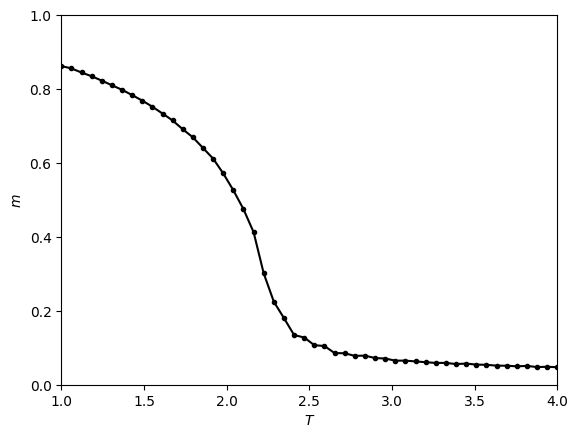

In [10]:
plt.figure()
plt.plot(Ts,m_avg,'k.-')
plt.xlabel('$T$')
plt.ylabel('$m$')
plt.xlim(1,4)
plt.ylim(0,1)
plt.show()

In [11]:
with open('m_%i.csv' %L, 'w') as my_file:
    np.savetxt(my_file,m_avg)

In [68]:
def total_energy():
    E = 0
    for i in range(L):
        for j in range(L):
            for k in range(L):
                E += energy_per_site(i,j,k)
    return E

In [69]:
def runMCMC():
    m = 0
    m_2avg = 0
    m_4avg = 0
    E_2avg = 0
    E_avg = 0
    for l in range(steps):
        mag = np.abs(magnetization())
        m += mag
        m_2avg += mag**2
        m_4avg += mag**4
        E = total_energy()
        E_2avg += E**2
        E_avg += E
        MCMC()
    m_abs = m/steps
    m_2avg = m_2avg/steps
    E_2avg = E_2avg/steps
    E_avg = E_avg/steps
    m_4avg = m_4avg/steps
    return m_abs, m_2avg, E_2avg, E_avg, m_4avg

In [70]:
Ts = np.linspace(1,4,50)
m_avg = np.zeros(len(Ts))
c = np.zeros(len(Ts))
susc = np.zeros(len(Ts))
binder = np.zeros(len(Ts))
for i in range(len(Ts)):
    T = Ts[i]
    m_avg[i], m_2avg, E_2avg, E_avg, m_4avg  = runMCMC()
    c[i] = 1/(N*T**2)*(E_2avg - E_avg**2)
    susc[i] = 1/T*(m_2avg - m_avg[i]**2)
    binder[i] = 1 - m_4avg/(3*m_2avg**2)

In [71]:
with open('c_%i.csv' %L, 'w') as my_file:
    np.savetxt(my_file,c)
with open('s_%i.csv' %L, 'w') as my_file:
    np.savetxt(my_file,susc)
with open('b_%i.csv' %L, 'w') as my_file:
    np.savetxt(my_file,binder)

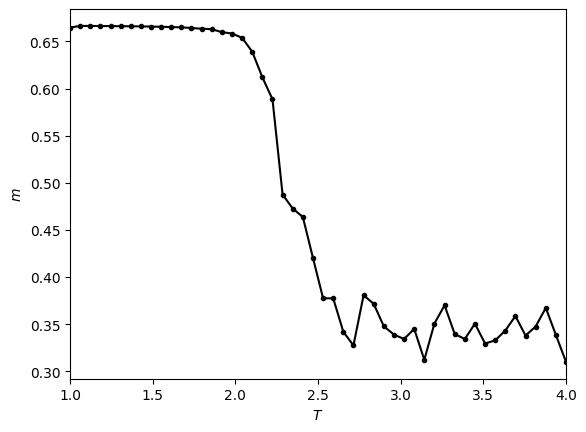

In [76]:
plt.figure()
plt.plot(Ts,binder,'k.-')
plt.xlabel('$T$')
plt.ylabel('$m$')
plt.xlim(1,4)
plt.show()